## 11 домашнее задание
f(x) = -12x^4*sin(cos(x)) - 18x^3+5x^2 + 10x - 30

    Определить корни
    Найти интервалы, на которых функция возрастает
    Найти интервалы, на которых функция убывает
    Построить график
    Вычислить вершину
    Определить промежутки, на котором f > 0
    Определить промежутки, на котором f < 0



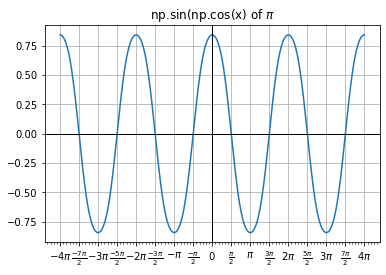

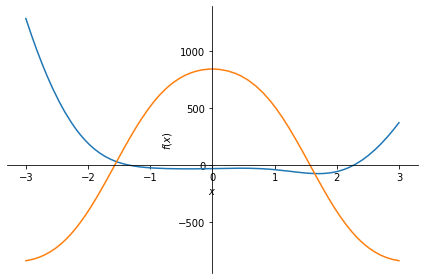

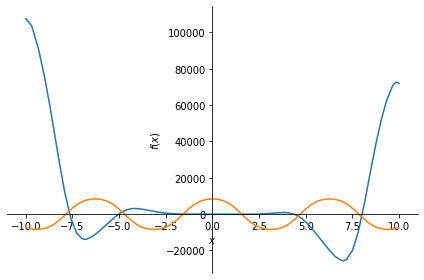

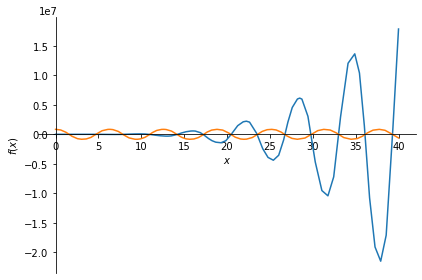

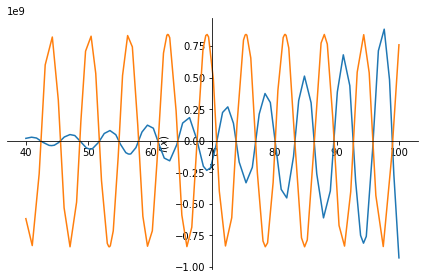

roots_around [pi/2, 3*pi/2, 2*pi - acos(pi), acos(pi)]
roots_real 1.57, 4.71
y_diff 12*x**4*sin(x)*cos(cos(x)) - 48*x**3*sin(cos(x)) - 54*x**2 + 10*x + 10


In [3]:
import numpy as np
from random import random
from random import randrange
import math
import sympy  
from sympy import plotting  
 
#https://stackoverflow.com/questions/40642061/how-to-set-axis-ticks-in-multiples-of-pi-python-matplotlib  форматирование 
import matplotlib.pyplot as plt

def multiple_formatter(denominator=2, number=np.pi, latex='\pi'):
    def gcd(a, b):
        while b:
            a, b = b, a%b
        return a
    def _multiple_formatter(x, pos):
        den = denominator
        num = np.int32(np.rint(den*x/number))
        com = gcd(num,den)
        (num,den) = (int(num/com),int(den/com))
        if den==1:
            if num==0:
                return r'$0$'
            if num==1:
                return r'$%s$'%latex
            elif num==-1:
                return r'$-%s$'%latex
            else:
                return r'$%s%s$'%(num,latex)
        else:
            if num==1:
                return r'$\frac{%s}{%s}$'%(latex,den)
            elif num==-1:
                return r'$\frac{-%s}{%s}$'%(latex,den)
            else:
                return r'$\frac{%s%s}{%s}$'%(num,latex,den)
    return _multiple_formatter


x = np.linspace(-np.pi*4, 4*np.pi,500)
plt.plot(x, np.sin(np.cos(x)))
plt.title(r'np.sin(np.cos(x) of $\pi$')
ax = plt.gca()
ax.grid(True)
# ax.set_aspect(1.0)
ax.axhline(0, color='black', lw=1)
ax.axvline(0, color='black', lw=1)
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 12))
ax.xaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))
plt.show()



# x = sympy.symbols('x', real=True)
x = sympy.symbols('x')
y = -12*(x**4)*sympy.sin(sympy.cos(x)) - 18*x**3+5*x**2 + 10*x - 30

y_sc_1k = 10**3*sympy.sin(sympy.cos(x))
y_sc_10k = 10**4*sympy.sin(sympy.cos(x))
y_sc_1kk = 10**6*sympy.sin(sympy.cos(x))
y_sc_1kkk = 10**9*sympy.sin(sympy.cos(x))
 

p1 = plotting.plot(y,(x,-3,3), show=False)
p2 = plotting.plot(y_sc_1k,(x,-3,3), show=False)
p1.append(p2[0])
p1.show()

p1 = plotting.plot(y,(x,-10,10), show=False)
p2 = plotting.plot(y_sc_10k,(x,-10,10), show=False)
p1.append(p2[0])
p1.show()

p1 = plotting.plot(y,(x, 0,40), show=False)
p2 = plotting.plot(y_sc_1kk,(x, 0,40), show=False)
p1.append(p2[0])
p1.show()

p1 = plotting.plot(y,(x,40,100), nb_of_points=600, show=False)
p2 = plotting.plot(y_sc_1kkk,(x,40,100), nb_of_points=600, show=False)
p1.append(p2[0])
p1.show()

roots_around = sympy.solve(sympy.sin(sympy.cos(x)), x)
print(f'roots_around {roots_around}')
print(f'roots_real {roots_around[0]:2.2f}, {roots_around[1]:2.2f}')#остальные 2 переодические корни 
 
# roots_all = sympy.solve(sympy.Eq(x**4-(x-2)**2, 0), x)#x = symbols('x', real=True)
# real_roots = [root for root in roots_all if root.is_real]  #вывод без комплексных корней
# print(real_roots)

# https://docs.sympy.org/latest/modules/solvers/solvers.html
    # пытаясь понять как найти корни нашел функцию которая может считать коэф в уравнении   sympy.solvers.solvers.solve_undetermined_coeffs(equ, coeffs, sym, **flags)
# https://stackoverflow.com/questions/50290678/solving-non-linear-set-of-symbolic-equations-with-sympy-python
    # решение систем уравнений с множеством переменных

# https://docs-sympy-org.translate.goog/latest/tutorials/intro-tutorial/solvers.html?_x_tr_sl=en&_x_tr_tl=ru&_x_tr_hl=ru&_x_tr_pto=wapp
    #переведенная страница пакета говорит что пока она такое решать не умеет
    # шлет лесом, сами ищите    sympy.solveset(-12*x**4*sympy.sin((sympy.cos(x)))- 18*x**3+5*x**2   + 10*x - 30, x,domain=sympy.Reals)
    
y_diff = y.diff(x)
print(f'y_diff {y_diff}')
# roots_all = sympy.solve(sympy.Eq(y_diff, 0), x) - не решается
  




По графику видно что нулевое значение функция принимает при sin(cos(x)) близком к 0

sympy.solve(sympy.sin(sympy.cos(x)), x)
>>>[pi/2, 3*pi/2, 2*pi - acos(pi), acos(pi)]
берем первые 2 реальных корня
pi/2, 3*pi/2 + 2*pi*n
c их помошью мы будем искать корни уравнения

для поиска корней используем - brentq
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.brentq.html
Перед использованием обязательно надо убедится что знаки функции противоположны с 2 сторон.

Для начала попробуем для x>5  где отчетливо заметно влияние подфункции



In [91]:
from scipy import optimize


def f_x(x):
    return -12*(x**4)*sympy.sin(sympy.cos(x)) - 18*x**3+5*x**2 + 10*x - 30


first_root_sub_func = np.pi/2
second_root_sub_func = 3*np.pi/2
d_pi = np.pi*2

# нужно как-то ввести диапозон в переборе
# фактически нужно найти корни уравнения по n c какого начинать и каким закончить
# уравнения 2 поскольку и ключей 2


def get_roots_diap_positive(start_diap=10, finish_diap=20, f=f_x)->list:
    f_roots = []
    c_start = sympy.symbols('c_start')

    y_diap_r1 = c_start*d_pi - start_diap + first_root_sub_func  # поправка на расширение диапозона +0.2 теряет корни
    y_diap_r2 = c_start*d_pi - start_diap + second_root_sub_func 
    # определяем начало шага по 2 корням
    roots_st1 = sympy.solve(y_diap_r1, c_start)
    roots_st2 = sympy.solve(y_diap_r2, c_start)
    # print(f"roots_st1 {roots_st1} {int(roots_st1[0]+1)}")  # окр в меньшую
    # print(f"roots_st2 {roots_st2} {int(roots_st2[0]+1)}")
    counter_start_r1 = int(roots_st1[0]+1)
    counter_start_r2 = int(roots_st2[0]+1)

    # завершение итерации
    y_diap_r1 = c_start*d_pi - finish_diap + first_root_sub_func 
    y_diap_r2 = c_start*d_pi - finish_diap + second_root_sub_func 
    roots_st1 = sympy.solve(y_diap_r1, c_start)
    roots_st2 = sympy.solve(y_diap_r2, c_start)
    # print(f"roots_st1 {roots_st1} {int(roots_st1[0])}")
    # print(f"roots_st2 {roots_st2} {int(roots_st2[0])}")
    counter_finish_r1 = int(roots_st1[0])
    counter_finish_r2 = int(roots_st2[0])

    for n in range(counter_start_r1, counter_finish_r1+1):
        locality_point = first_root_sub_func+d_pi*n
        # print(f"f(locality_point+0.2) {f(locality_point+0.2)} f(locality_point-0.2) {f(locality_point-0.2)}")
        if(f(locality_point+0.2) > 0 and f(locality_point-0.2) < 0) or (f(locality_point+0.2) < 0 and f(locality_point-0.2) > 0):
            # print('ok')
            root = optimize.brentq(f, locality_point+0.2, locality_point-0.2)
            f_roots.append(root)
            # print(root)

    for n in range(counter_start_r2, counter_finish_r2+1):
        locality_point = second_root_sub_func+d_pi*n
        # print(f"f(locality_point+0.2) {f(locality_point+0.2)} f(locality_point-0.2) {f(locality_point-0.2)}")
        if(f(locality_point+0.2) > 0 and f(locality_point-0.2) < 0) or (f(locality_point+0.2) < 0 and f(locality_point-0.2) > 0):
            # print('ok')
            root = optimize.brentq(f, locality_point+0.2, locality_point-0.2)
            f_roots.append(root)
            # print(root)
    return f_roots 


def get_roots_diap_negative(start_diap=-20, finish_diap=-8, f=f_x)->list:
    f_roots = []

    c_start = sympy.symbols('c_start')

    y_diap_r1 = c_start*d_pi - start_diap + first_root_sub_func  # поправка на расширение диапозона 0.2
    y_diap_r2 = c_start*d_pi - start_diap + second_root_sub_func
    # определяем начало шага по 2 корням
    roots_st1 = sympy.solve(y_diap_r1, c_start)
    roots_st2 = sympy.solve(y_diap_r2, c_start)
    # print(f"roots_st1 {roots_st1} {int(roots_st1[0]+0)}")  # окр в меньшую
    # print(f"roots_st2 {roots_st2} {int(roots_st2[0]+0)}")
    counter_start_r1 = int(roots_st1[0]+0)
    counter_start_r2 = int(roots_st2[0]+0)

    # завершение итерации
    y_diap_r1 = c_start*d_pi - finish_diap + first_root_sub_func 
    y_diap_r2 = c_start*d_pi - finish_diap + second_root_sub_func 
    roots_st1 = sympy.solve(y_diap_r1, c_start)
    roots_st2 = sympy.solve(y_diap_r2, c_start)
    # print(f"roots_st1 {roots_st1} {int(roots_st1[0])}")
    # print(f"roots_st2 {roots_st2} {int(roots_st2[0])}")
    counter_finish_r1 = int(roots_st1[0])
    counter_finish_r2 = int(roots_st2[0])

    for n in range(counter_start_r1, counter_finish_r1+1):
        locality_point = first_root_sub_func+d_pi*n
        # print(f"f(locality_point+0.2) {f(locality_point+0.2)} f(locality_point-0.2) {f(locality_point-0.2)}")
        if(f(locality_point+0.2) > 0 and f(locality_point-0.2) < 0) or (f(locality_point+0.2) < 0 and f(locality_point-0.2) > 0):
            # print('ok')
            root = optimize.brentq(f, locality_point-0.2, locality_point+0.2)
            f_roots.append(root)
            # print(root)

    for n in range(counter_start_r2, counter_finish_r2+1):
        locality_point = second_root_sub_func+d_pi*n
        # print(f"f(locality_point+0.2) {f(locality_point+0.2)} f(locality_point-0.2) {f(locality_point-0.2)}")
        if(f(locality_point+0.2) > 0 and f(locality_point-0.2) < 0) or (f(locality_point+0.2) < 0 and f(locality_point-0.2) > 0):
            # print('ok')
            root = optimize.brentq(f, locality_point-0.2, locality_point+0.2)
            f_roots.append(root)
            # print(root)
    return f_roots 
 


# 5 центральных вручную иначе прийдется слишком большой допуск делать
def get_roots_x_zero_around_f(start_diap=-10, finish_diap=8)->list:
    roots_senter = []
    diaps = [[-9, -7], [-6, -4], [-2, -1], [2, 3], [4, 5]]
    for diap in diaps:
        # print(f"diap {diap}")
        root = optimize.brentq(f, diap[0], diap[1])
        roots_senter.append(root)
        # print(root)
    f_roots = [r for r in roots_senter if(r>start_diap and r<finish_diap)]
    # print(r)
    return f_roots 

 
def get_roots_by_diap_f(start_diap=-50, finish_diap=50):
    all_roots = []
    if(start_diap<-9):
        all_roots.extend(get_roots_diap_negative(start_diap,-9, f_x))
    if(start_diap<6):
        all_roots.extend(get_roots_x_zero_around_f(start_diap,finish_diap))
    if(finish_diap>6):
        all_roots.extend(get_roots_diap_positive(6,finish_diap, f_x))
    all_roots.sort()
    return all_roots

print(get_roots_by_diap_f(-51.9, 48.7))

[-51.80716813908097, -48.7256484817221, -45.51993706678439, -42.44707353758902, -39.231398597272864, -36.17010995886504, -32.94079579801423, -29.895779672067896, -26.64664615861623, -23.626197296436057, -20.345594135942548, -17.36655250690751, -14.02805599166234, -11.133769061035535, -7.650622285132749, -5.026865928206212, -1.3389666392771082, 2.2730568457562486, 4.383523697968959, 8.035164133413518, 10.860649989594162, 14.240584810252116, 17.19284807004507, 20.49260006321674, 23.498838876455114, 26.759029792212125, 29.795242928163304, 33.03176123569334, 36.08706219352496, 39.30780432129521, 42.3763314152197, 45.58580139460497, 48.66403567936045]


## На основе поика корней функции формируем список интервалов где функция > 0 или < 0

In [93]:

def get_intervals_f_b_zero(start_diap=-50, finish_diap=50, f=f_x)->list:
    roots_f = get_roots_by_diap_f(start_diap, finish_diap)
    # print(f"roots_f {roots_f}")
   
    list_intervals =[]
    if roots_f:
        if(start_diap < roots_f[0]) and f(start_diap)>0:
            list_intervals.append([start_diap,roots_f[0]])
        
        if(len(roots_f)>1):
            for i in range(0,len(roots_f)-1):
                if f((roots_f[i]+roots_f[i+1])/2)>0:
                    list_intervals.append([roots_f[i],roots_f[i+1]])

        if(finish_diap > roots_f[-1]) and f(start_diap)>0:
            list_intervals.append([roots_f[-1],finish_diap])

    return list_intervals
 
def get_intervals_f_l_zero(start_diap=-50, finish_diap=50, f=f_x)->list:
    roots_f = get_roots_by_diap_f(start_diap, finish_diap )
   
    list_intervals =[]
    if roots_f:
        if(start_diap < roots_f[0]) and f(start_diap)<0:
            list_intervals.append([start_diap,roots_f[0]])
        
        if(len(roots_f)>1):
            for i in range(0,len(roots_f)-1):
                if f((roots_f[i]+roots_f[i+1])/2)<0:
                    list_intervals.append([roots_f[i],roots_f[i+1]])

        if(finish_diap > roots_f[-1]) and f(start_diap)<0:
            list_intervals.append([roots_f[-1],finish_diap])

    return list_intervals

print("интервалы на которых функция > 0 x=[-52, 54]")
print(get_intervals_f_b_zero(-52, 54, f_x))
print("интервалы на которых функция < 0 x=[-52, 54]")
print(get_intervals_f_l_zero(-52, 54, f_x))





интервалы на которых функция > 0 x=[-52, 54]
[[-52, -51.80716813908097], [-48.7256484817221, -45.51993706678439], [-42.44707353758902, -39.231398597272864], [-36.17010995886504, -32.94079579801423], [-29.895779672067896, -26.64664615861623], [-23.626197296436057, -20.345594135942548], [-17.36655250690751, -14.02805599166234], [-11.133769061035535, -7.650622285132749], [-5.026865928206212, -1.3389666392771082], [2.2730568457562486, 4.383523697968959], [8.035164133413518, 10.860649989594162], [14.240584810252116, 17.19284807004507], [20.49260006321674, 23.498838876455114], [26.759029792212125, 29.795242928163304], [33.03176123569334, 36.08706219352496], [39.30780432129521, 42.3763314152197], [45.58580139460497, 48.66403567936045], [51.86504740710776, 54]]
интервалы на которых функция < 0 x=[-52, 54]
[[-51.80716813908097, -48.7256484817221], [-45.51993706678439, -42.44707353758902], [-39.231398597272864, -36.17010995886504], [-32.94079579801423, -29.895779672067896], [-26.64664615861623, 

## Анализируем поведение производной по графикам и зависимость от sympy.sin(x)*sympy.cos(sympy.cos(x))


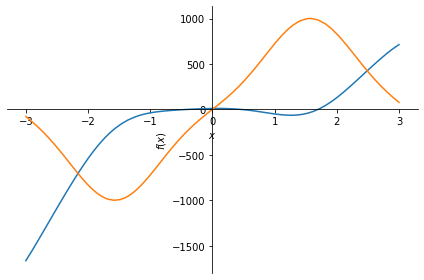

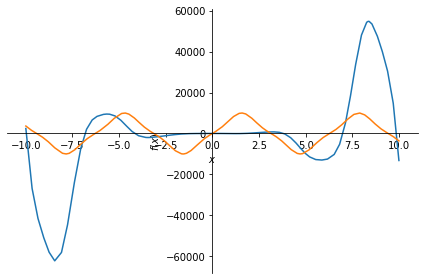

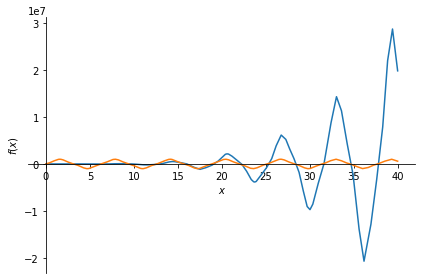

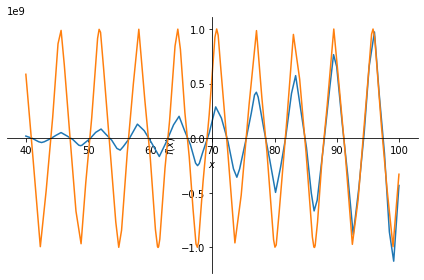

roots_around [0, pi, 2*pi - acos(pi/2), 2*pi - acos(3*pi/2), acos(pi/2), acos(3*pi/2)]
roots_real 0.00, 3.14


In [97]:

def diff_f_x(x):
    return 12*x**4*sympy.sin(x)*sympy.cos(sympy.cos(x)) - 48*x**3*sympy.sin(sympy.cos(x)) - 54*x**2 + 10*x + 10
 
diff_y = 12*x**4*sympy.sin(x)*sympy.cos(sympy.cos(x)) - 48*x**3*sympy.sin(sympy.cos(x)) - 54*x**2 + 10*x + 10

y_sc_1k = 10**3*sympy.sin(x)*sympy.cos(sympy.cos(x))
y_sc_10k = 10**4*sympy.sin(x)*sympy.cos(sympy.cos(x))
y_sc_1kk = 10**6*sympy.sin(x)*sympy.cos(sympy.cos(x))
y_sc_1kkk = 10**9*sympy.sin(x)*sympy.cos(sympy.cos(x))
 

p1 = plotting.plot(diff_y,(x,-3,3), show=False)
p2 = plotting.plot(y_sc_1k,(x,-3,3), show=False)
p1.append(p2[0])
p1.show()

p1 = plotting.plot(diff_y,(x,-10,10), show=False)
p2 = plotting.plot(y_sc_10k,(x,-10,10), show=False)
p1.append(p2[0])
p1.show()

p1 = plotting.plot(diff_y,(x, 0,40), show=False)
p2 = plotting.plot(y_sc_1kk,(x, 0,40), show=False)
p1.append(p2[0])
p1.show()

p1 = plotting.plot(diff_y,(x,40,100), nb_of_points=600, show=False)
p2 = plotting.plot(y_sc_1kkk,(x,40,100), nb_of_points=600, show=False)
p1.append(p2[0])
p1.show()

roots_around = sympy.solve(sympy.sin(x)*sympy.cos(sympy.cos(x)), x)
print(f'roots_around {roots_around}')
print(f'roots_real {roots_around[0]:2.2f}, {roots_around[1]:2.2f}')#остальные 2 переодические корни 


## Повторяем для производной тоже что и для функции для опредения периодов возрастания и убывания функции

In [149]:

first_root_ssub_func = 0
second_root_ssub_func = np.pi 
 
 
def get_n(diap,root_ssub_func):
    n = sympy.symbols('n')
    y_diap = n*d_pi - diap + root_ssub_func
    roots = sympy.solve(y_diap, n)
    if roots:
        return roots[0]
    else:
        return []

def find_roots_by_n(f, root_ssub_func, counter_start=0, counter_finish=5)->list:
    f_roots = []

    delta_b = 0.6# в начале коодринат вес коэф с макс стеменью влияет меньше => отклонение больше
    for n in range(counter_start, counter_finish+1):
        locality_point = root_ssub_func+d_pi*n
         
        if(n < 6):#большой разсос
            loc_p_delta = locality_point+delta_b
            loc_m_delta = locality_point-delta_b
            f_loc_p_delta = f(loc_p_delta)
            f_loc_m_delta = f(loc_m_delta)
            # print(f"f(locality_point+{delta_b}) {f_loc_p_delta} f(locality_point-{delta_b}) {f_loc_m_delta}  (x) = {(locality_point)}")
            if(f_loc_p_delta > 0 and f_loc_m_delta < 0) or (f_loc_p_delta < 0 and f_loc_m_delta > 0):#! проверки на диапозон можно удалить они страховочные
                root = optimize.brentq(f, loc_p_delta, loc_m_delta)
                # print('ok')
                f_roots.append(root)
        else:
            f_loc_p_delta = f(locality_point+0.2)
            f_loc_m_delta = f(locality_point-0.2)
            if(f_loc_p_delta > 0 and f_loc_m_delta < 0) or (f_loc_p_delta < 0 and f_loc_m_delta > 0):
                root = optimize.brentq(f, locality_point+0.2, locality_point-0.2)
                f_roots.append(root)


    return f_roots

def get_roots_diap_positive_diff(start_diap=10, finish_diap=20, f=diff_f_x)->list:
    f_roots = [] 

    counter_start_r1 = int(get_n(start_diap,first_root_ssub_func)+1)
    counter_start_r2 = int(get_n(start_diap,second_root_ssub_func)+1)

    # завершение итерации
    counter_finish_r1 = int(get_n(finish_diap,first_root_ssub_func))
    counter_finish_r2 = int(get_n(finish_diap,second_root_ssub_func))

    f_roots.extend(find_roots_by_n(f, first_root_ssub_func, counter_start_r1, counter_finish_r1))

    f_roots.extend(find_roots_by_n(f, second_root_ssub_func, counter_start_r2, counter_finish_r2))
 
    return f_roots 


def get_roots_diap_negative_diff(start_diap=-20, finish_diap=-8, f=diff_f_x)->list:
    f_roots = []

    counter_start_r1 = int(get_n(start_diap,first_root_ssub_func))
    counter_start_r2 = int(get_n(start_diap,second_root_ssub_func))

    # завершение итерации
    counter_finish_r1 = int(get_n(finish_diap,first_root_ssub_func))
    counter_finish_r2 = int(get_n(finish_diap,second_root_ssub_func))
  
    f_roots.extend(find_roots_by_n(f, first_root_ssub_func, counter_start_r1, counter_finish_r1))
    
    f_roots.extend(find_roots_by_n(f, second_root_ssub_func, counter_start_r2, counter_finish_r2))

    return f_roots 
  
# 6 центральных вручную иначе прийдется слишком большой допуск делать
def get_roots_x_zero_around_diff_f(start_diap=-10, finish_diap=8, f=diff_f_x)->list:
    roots_senter = []
    diaps =[[-5, -4], [-1, 0], [0, 1], [1, 2], [3, 4], [6, 8]]
    for diap in diaps:
        # print(f"diap {diap}")
        root = optimize.brentq(f, diap[0], diap[1])
        roots_senter.append(root)
    f_roots = [r for r in roots_senter if(r>start_diap and r<finish_diap)]
    return f_roots 

 
def get_roots_by_diap_diff_f(start_diap=-50, finish_diap=50):
    all_roots = []
    if(start_diap<-6):
        all_roots.extend(get_roots_diap_negative_diff(start_diap,-6, diff_f_x))
    if(start_diap<8):
        all_roots.extend(get_roots_x_zero_around_diff_f(start_diap,finish_diap))
    if(finish_diap>8):
        all_roots.extend(get_roots_diap_positive_diff(8,finish_diap, diff_f_x))
    all_roots.sort()
    return all_roots

# print(get_roots_by_diap_diff_f(-51.9, -10))
print(get_roots_by_diap_diff_f(-47.3, 38))

[-47.25726150719287, -44.116902842976565, -40.99429552059524, -37.854299360561264, -34.73832826731873, -31.598862315809907, -28.493574156292844, -25.354898509816152, -22.26825844804848, -19.13070791192207, -16.08051757163425, -12.943805208982415, -9.978953761015301, -6.831370040000846, -4.167783523850484, -0.39267717993275003, 0.4545735681087823, 1.700607277951214, 3.8193108333822843, 7.001031658540949, 9.877149053972325, 13.012344828500089, 16.031456709960167, 19.167478450493096, 22.239791410659734, 25.37753963793247, 28.475180245615984, 31.614081118445437, 34.725544730886206, 37.86518023156012]


## по корням определяем промежутки возврастания/убывания основной функции
корни проивзодной являются локальными вершинами функции


In [152]:
def get_intervals_f_up(start_diap=-50, finish_diap=50, f=diff_f_x)->list:
    roots_f = get_roots_by_diap_diff_f(start_diap, finish_diap)
    # print(f"roots_f {roots_f}")
   
    list_intervals =[]
    if roots_f:
        if(start_diap < roots_f[0]) and f(start_diap)>0:
            list_intervals.append([start_diap,roots_f[0]])
        
        if(len(roots_f)>1):
            for i in range(0,len(roots_f)-1):
                if f((roots_f[i]+roots_f[i+1])/2)>0:
                    list_intervals.append([roots_f[i],roots_f[i+1]])

        if(finish_diap > roots_f[-1]) and f(start_diap)>0:
            list_intervals.append([roots_f[-1],finish_diap])

    return list_intervals
 
def get_intervals_f_down(start_diap=-50, finish_diap=50, f=diff_f_x)->list:
    roots_f = get_roots_by_diap_diff_f(start_diap, finish_diap )
   
    list_intervals =[]
    if roots_f:
        if(start_diap < roots_f[0]) and f(start_diap)<0:
            list_intervals.append([start_diap,roots_f[0]])
        
        if(len(roots_f)>1):
            for i in range(0,len(roots_f)-1):
                if f((roots_f[i]+roots_f[i+1])/2)<0:
                    list_intervals.append([roots_f[i],roots_f[i+1]])

        if(finish_diap > roots_f[-1]) and f(start_diap)<0:
            list_intervals.append([roots_f[-1],finish_diap])

    return list_intervals

print("Интервалы на которых функция возрастает x=[-52, 54]")
print(get_intervals_f_up(-52, 54, f_x))
print()
print("Интервалы на которых функция убывает x=[-52, 54]")
print(get_intervals_f_down(-52, 54, f_x))
 

Интервалы на которых функция возрастает x=[-52, 54]
[[-52, -50.384251816932625], [-47.25726150719287, -44.116902842976565], [-40.99429552059524, -37.854299360561264], [-34.73832826731873, -31.598862315809907], [-28.493574156292844, -25.354898509816152], [-22.26825844804848, -19.13070791192207], [-16.08051757163425, -12.943805208982415], [-9.978953761015301, -6.831370040000846], [-4.167783523850484, -0.39267717993275003], [1.700607277951214, 3.8193108333822843], [7.001031658540949, 9.877149053972325], [13.012344828500089, 16.031456709960167], [19.167478450493096, 22.239791410659734], [25.37753963793247, 28.475180245615984], [31.614081118445437, 34.725544730886206], [37.86518023156012, 40.98492913051317], [44.12504648268133, 47.25011916046603], [50.39056495442693, 53.519247119591675], [53.519247119591675, 54]]

Интервалы на которых функция убывает x=[-52, 54]
[[-50.384251816932625, -47.25726150719287], [-44.116902842976565, -40.99429552059524], [-37.854299360561264, -34.73832826731873], 